# Naive Bayes From Scratch

|               | ID  | m1  | m2  | m3  | Likelihood of Target movie |
| ------------- | --- | --- | --- | --- | -------------------------- |
| Training data | 1   | 0   | 1   | 1   | Y                          |
|               | 2   | 0   | 0   | 1   | N                          |
|               | 3   | 0   | 0   | 0   | Y                          |
|               | 4   | 1   | 1   | 0   | Y                          |
| Testing Data  | 5   | 1   | 1   | 0   | ?                          |

In [1]:
import numpy as np

In [2]:
X_train = np.array([[0,1,1],
                    [0,0,1],
                    [0,0,0],
                    [1,1,0]])
y_train = np.array(['Y', 'N', 'Y', 'Y'])

X_test = np.array([[1,1,0]])

In [3]:
def get_label_indices(labels):
    """
        Group samples based on their labels and return indices

    Args:
        labes (list): list of labels
        
    Returns:
        label_indices (dict): {class1: [indices], class2: [indices]}
    """
    
    from collections import defaultdict
    label_indices = defaultdict(list)
    
    for index, label in enumerate(labels):
        label_indices[label].append(index)
        
    return label_indices

In [4]:
# y: 0,2,3 indicated ID 0,2,3 have class label Y and Id 1 has class label N
label_indices = get_label_indices(y_train)
print(label_indices)

defaultdict(<class 'list'>, {'Y': [0, 2, 3], 'N': [1]})


In [5]:
# calculating Prior for dataset

def get_prior(label_indices):
    """
        Compute prior based on training samples
        
    Args:
        label_indices (dict): grouped sample indices by class
        
    Returns:
        prior (dict): with class label as KEY, and corresponding prior value as VALUE. {Y:0.75}
    """
    
    prior = {label: len(indices) for label, indices in label_indices.items()}
    total_count = sum(prior.values())
    
    for label in prior:
        prior[label] /= total_count
        
    return prior

In [6]:
prior = get_prior(label_indices)
print(prior)

{'Y': 0.75, 'N': 0.25}


In [8]:
# calculating Likelihood which is conditional Probabily: P{feature|class}
# We set the smoothing value to 1 here, which can also be 0 for no smoothing, or any other positive value, as long as a higher classification performance is
def get_likelihood(X_train, label_indices, smoothing=1):
    """
        Compute Likelihood based on training samples

    Args:
        X_train (array): matrix of features
        label_indices (dict): grouped sample indices by class
        smoothing (int, optional): Laplace smoothing to eliminate zero-multiplication factor(the unknown unlikelihood). Defaults to 1.
    
    Returns:
        likelihood (dict): with class a KEY, corresponding conditional probability P{feature|class} as VALUE
    """
    
    likelihood = {}
    for label, indices in label_indices.items():
        likelihood[label] = X_train[indices, :].sum(axis=0) + smoothing
        
        total_count = len(indices)
        likelihood[label] = likelihood[label] / (total_count+2*smoothing)
        
    return likelihood
    

In [9]:
likelihood = get_likelihood(X_train, label_indices)
print(likelihood)

{'Y': array([0.4, 0.6, 0.4]), 'N': array([0.33333333, 0.33333333, 0.66666667])}


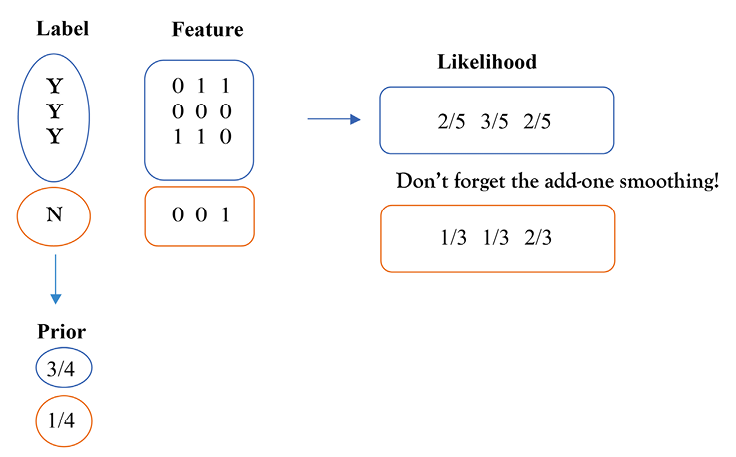

In [10]:
# calculating posterior for testing new samples
def get_posterior(X_test, prior, likelihood):
    """
        Compute posterior for testing samples, based on prior and likelihood

    Args:
        X_test (array): testing samples
        prior (dict): with class label as key, corresponding prior as the value.
        likelihood (dict): with class label as key, corresponding conditional probability P(X_train|class) vector as value.
        
    Returns:
        posteriors (dict): with class label as KEY, corresponding posterior as VALUE
    """
    posteriors = []
    for x in X_test:
        # posterior is proportional to prior * likelihood
        posterior = prior.copy()
        for label, likelihood_label in likelihood.items():
            for index, bool_value in enumerate(x):
                posterior[label] *= likelihood_label[index] if bool_value else (1 - likelihood_label[index])
                
        # normalize so that all sums up to 1
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
        
    return posteriors


In [11]:
# predicting on X_test
posterior = get_posterior(X_test, prior, likelihood)
print(posterior)

[{'Y': 0.9210360075805433, 'N': 0.07896399241945673}]
